In [2]:
# Necessary because jupyter restricts relative imports from parent directories
import os
if os.getcwd().split('/')[-1] != 'tcav':
    print(os.getcwd())
    os.chdir('../')
    os.chdir('../')
    os.chdir('../')    
    print(os.getcwd())

/code/tcav/tcav_examples/discrete
/code


In [3]:
from tensorflow.io import gfile
from tcav.tcav_examples.discrete.kdd99_activation_generator import KDD99DiscreteActivationGenerator
from tcav.utils import create_session
from tcav.tcav_examples.discrete.kdd99_model_wrapper import KDD99KerasModelWrapper


In [4]:
# Make source directory, 
source_dir = "./tcav/tcav_examples/discrete/kdd_sanity2"
working_dir = source_dir
acts_dir = os.path.join(working_dir, "activations")
gfile.makedirs(acts_dir)
cav_dir = os.path.join(working_dir, "cav")
gfile.makedirs(cav_dir)


In [5]:
# Make data
! python ./tcav/tcav_examples/discrete/make_kdd99_concepts.py --source_dir={source_dir}


2021-03-24 15:19:34.204493: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Available concepts for KDD99 dataset are: 
['dst_host_same_src_port_rate_less_than_one', 'dst_host_same_src_port_rate_more_than_one']


Available targets for KDD99 dataset are: 
[b'normal.' b'buffer_overflow.' b'loadmodule.' b'perl.' b'neptune.'
 b'smurf.' b'guess_passwd.' b'pod.' b'teardrop.' b'portsweep.' b'ipsweep.'
 b'land.' b'ftp_write.' b'back.' b'imap.' b'satan.' b'phf.' b'nmap.'
 b'multihop.' b'warezmaster.' b'warezclient.' b'spy.' b'rootkit.']


Created 10 random folders 

Successfully created data at ./tcav/tcav_examples/discrete/kdd_sanity2


In [6]:
# Create models
label_path = os.path.join(source_dir, "labels.txt")
model_path = os.path.join(source_dir, "kdd99_2.h5")
uci_model = KDD99KerasModelWrapper(create_session(), model_path, label_path)



In [7]:
# Create activation generator
act_gen = KDD99DiscreteActivationGenerator(model=uci_model, source_dir=source_dir, acts_dir=acts_dir, max_examples=200)

In [8]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

target = "guess_passwd."
bottlenecks = ["dense", "dense_1" ]
concepts = ["dst_host_same_src_port_rate_less_than_one", "dst_host_same_src_port_rate_more_than_one"]
alphas = [0.01]



my_tcav = TCAV(create_session,
                   target,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)


results = my_tcav.run()


INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_0'] guess_passwd. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_1'] guess_passwd. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_2'] guess_passwd. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_3'] guess_passwd. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_4'] guess_passwd. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_5'] guess_passwd. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_6'] guess_passwd. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_7'] guess_passwd. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_8'] guess_passwd. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_9']

INFO:tensorflow:dense ['random500_9', 'random500_5'] guess_passwd. 0.01
INFO:tensorflow:dense ['random500_9', 'random500_6'] guess_passwd. 0.01
INFO:tensorflow:dense ['random500_9', 'random500_7'] guess_passwd. 0.01
INFO:tensorflow:dense ['random500_9', 'random500_8'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['dst_host_same_src_port_rate_less_than_one', 'random500_0'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['dst_host_same_src_port_rate_less_than_one', 'random500_1'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['dst_host_same_src_port_rate_less_than_one', 'random500_2'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['dst_host_same_src_port_rate_less_than_one', 'random500_3'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['dst_host_same_src_port_rate_less_than_one', 'random500_4'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['dst_host_same_src_port_rate_less_than_one', 'random500_5'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['dst_host_same_src_port_rate_less_than_one', 'random500_6'] gue

INFO:tensorflow:dense_1 ['random500_8', 'random500_7'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_8', 'random500_9'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_9', 'random500_0'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_9', 'random500_1'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_9', 'random500_2'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_9', 'random500_3'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_9', 'random500_4'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_9', 'random500_5'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_9', 'random500_6'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_9', 'random500_7'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_9', 'random500_8'] guess_passwd. 0.01
INFO:tensorflow:TCAV will 220 params
INFO:tensorflow:running 220 params
INFO:tensorflow:Running param 0 of 220
INFO:tensorflow:running guess_passwd. ['dst_host_same_src_port_rate_less_th

INFO:tensorflow:running guess_passwd. ['dst_host_same_src_port_rate_less_than_one', 'random500_9']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_dst_host_same_src_port_rate_less_than_one_dense shape (200, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_9_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense shape (53, 1000)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/dst_host_same_src_port_rate_less_than_one-random500_9-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'dst_host_same_src_port_rate_less_than_one': 1.0, 'random500_9': 1.0, 'overall': 1.0}
INFO:tensorflow:Running param 10 of 220
INFO:tensorflow:running guess_passwd. ['dst_host_same_src_port_rate_more_than_one', 'random500_0']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_dst_host_same_src_p

INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_dst_host_same_src_port_rate_more_than_one_dense shape (200, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_9_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense shape (53, 1000)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/dst_host_same_src_port_rate_more_than_one-random500_9-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'dst_host_same_src_port_rate_more_than_one': 0.3333333333333333, 'random500_9': 1.0, 'overall': 0.7142857142857143}
INFO:tensorflow:Running param 20 of 220
INFO:tensorflow:running guess_passwd. ['random500_0', 'random500_1']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_0_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_r

INFO:tensorflow:CAV accuracies: {'random500_1': 0.0, 'random500_2': 1.0, 'overall': 0.5714285714285714}
INFO:tensorflow:Running param 31 of 220
INFO:tensorflow:running guess_passwd. ['random500_1', 'random500_3']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_1_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_3_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense shape (53, 1000)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_1-random500_3-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_1': 0.75, 'random500_3': 0.0, 'overall': 0.42857142857142855}
INFO:tensorflow:Running param 32 of 220
INFO:tensorflow:running guess_passwd. ['random500_1', 'random500_4']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500

INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_2-random500_5-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_2': 1.0, 'random500_5': 0.0, 'overall': 0.5714285714285714}
INFO:tensorflow:Running param 43 of 220
INFO:tensorflow:running guess_passwd. ['random500_2', 'random500_6']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_2_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_6_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense shape (53, 1000)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_2-random500_6-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_2': 1.0, 'random500_6': 0.75, 'overall': 0.8571428571428571}
INFO:tensorflow:Running param 44 of 220
INFO:tensorflow:running guess_pas

INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense shape (53, 1000)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_3-random500_8-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_3': 0.25, 'random500_8': 1.0, 'overall': 0.5714285714285714}
INFO:tensorflow:Running param 55 of 220
INFO:tensorflow:running guess_passwd. ['random500_3', 'random500_9']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_3_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_9_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense shape (53, 1000)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_3-random500_9-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_3': 0.66666666

INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_5_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_1_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense shape (53, 1000)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_5-random500_1-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_5': 0.25, 'random500_1': 1.0, 'overall': 0.5714285714285714}
INFO:tensorflow:Running param 67 of 220
INFO:tensorflow:running guess_passwd. ['random500_5', 'random500_2']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_5_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_2_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activa

INFO:tensorflow:Running param 78 of 220
INFO:tensorflow:running guess_passwd. ['random500_6', 'random500_4']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_6_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_4_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense shape (53, 1000)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_6-random500_4-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_6': 0.0, 'random500_4': 0.75, 'overall': 0.42857142857142855}
INFO:tensorflow:Running param 79 of 220
INFO:tensorflow:running guess_passwd. ['random500_6', 'random500_5']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_6_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/a

INFO:tensorflow:CAV accuracies: {'random500_7': 1.0, 'random500_6': 0.6666666666666666, 'overall': 0.8571428571428571}
INFO:tensorflow:Running param 90 of 220
INFO:tensorflow:running guess_passwd. ['random500_7', 'random500_8']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_7_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_8_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense shape (53, 1000)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_7-random500_8-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_7': 0.6666666666666666, 'random500_8': 1.0, 'overall': 0.8571428571428571}
INFO:tensorflow:Running param 91 of 220
INFO:tensorflow:running guess_passwd. ['random500_7', 'random500_9']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity

INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_9-random500_0-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_9': 1.0, 'random500_0': 0.3333333333333333, 'overall': 0.7142857142857143}
INFO:tensorflow:Running param 102 of 220
INFO:tensorflow:running guess_passwd. ['random500_9', 'random500_1']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_9_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_1_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense shape (53, 1000)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_9-random500_1-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_9': 1.0, 'random500_1': 0.0, 'overall': 0.5714285714285714}
INFO:tensorflow:Running param 103 of 220
INFO:tensorflow:r

INFO:tensorflow:CAV accuracies: {'dst_host_same_src_port_rate_less_than_one': 1.0, 'random500_2': 1.0, 'overall': 1.0}
INFO:tensorflow:Running param 113 of 220
INFO:tensorflow:running guess_passwd. ['dst_host_same_src_port_rate_less_than_one', 'random500_3']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_dst_host_same_src_port_rate_less_than_one_dense_1 shape (200, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_3_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense_1 shape (53, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/dst_host_same_src_port_rate_less_than_one-random500_3-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'dst_host_same_src_port_rate_less_than_one': 1.0, 'random500_3': 0.6666666666666666, 'overall': 0.8571428571428571}
INFO:tensorflow:Running param 114 of 220
INFO

INFO:tensorflow:Running param 123 of 220
INFO:tensorflow:running guess_passwd. ['dst_host_same_src_port_rate_more_than_one', 'random500_3']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_dst_host_same_src_port_rate_more_than_one_dense_1 shape (200, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_3_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense_1 shape (53, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/dst_host_same_src_port_rate_more_than_one-random500_3-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'dst_host_same_src_port_rate_more_than_one': 1.0, 'random500_3': 1.0, 'overall': 1.0}
INFO:tensorflow:Running param 124 of 220
INFO:tensorflow:running guess_passwd. ['dst_host_same_src_port_rate_more_than_one', 'random500_4']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/k

INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense_1 shape (53, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_0-random500_4-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_0': 0.0, 'random500_4': 1.0, 'overall': 0.42857142857142855}
INFO:tensorflow:Running param 134 of 220
INFO:tensorflow:running guess_passwd. ['random500_0', 'random500_5']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_0_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_5_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense_1 shape (53, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_0-random500_5-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_0': 0

INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_1_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_7_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense_1 shape (53, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_1-random500_7-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_1': 1.0, 'random500_7': 0.3333333333333333, 'overall': 0.7142857142857143}
INFO:tensorflow:Running param 146 of 220
INFO:tensorflow:running guess_passwd. ['random500_1', 'random500_8']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_1_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_8_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discr

INFO:tensorflow:CAV accuracies: {'random500_2': 0.25, 'random500_9': 1.0, 'overall': 0.5714285714285714}
INFO:tensorflow:Running param 157 of 220
INFO:tensorflow:running guess_passwd. ['random500_3', 'random500_0']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_3_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_0_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense_1 shape (53, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_3-random500_0-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_3': 0.6666666666666666, 'random500_0': 0.0, 'overall': 0.2857142857142857}
INFO:tensorflow:Running param 158 of 220
INFO:tensorflow:running guess_passwd. ['random500_3', 'random500_1']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activ

INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense_1 shape (53, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_4-random500_2-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_4': 1.0, 'random500_2': 0.25, 'overall': 0.5714285714285714}
INFO:tensorflow:Running param 169 of 220
INFO:tensorflow:running guess_passwd. ['random500_4', 'random500_3']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_4_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_3_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense_1 shape (53, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_4-random500_3-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_4': 0

INFO:tensorflow:running guess_passwd. ['random500_5', 'random500_6']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_5_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_6_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense_1 shape (53, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_5-random500_6-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_5': 0.25, 'random500_6': 0.3333333333333333, 'overall': 0.2857142857142857}
INFO:tensorflow:Running param 181 of 220
INFO:tensorflow:running guess_passwd. ['random500_5', 'random500_7']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_5_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_7_den

INFO:tensorflow:CAV accuracies: {'random500_6': 0.3333333333333333, 'random500_8': 1.0, 'overall': 0.7142857142857143}
INFO:tensorflow:Running param 192 of 220
INFO:tensorflow:running guess_passwd. ['random500_6', 'random500_9']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_6_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_9_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense_1 shape (53, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_6-random500_9-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_6': 0.25, 'random500_9': 0.3333333333333333, 'overall': 0.2857142857142857}
INFO:tensorflow:Running param 193 of 220
INFO:tensorflow:running guess_passwd. ['random500_7', 'random500_0']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kd

INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_8-random500_1-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_8': 0.0, 'random500_1': 1.0, 'overall': 0.42857142857142855}
INFO:tensorflow:Running param 204 of 220
INFO:tensorflow:running guess_passwd. ['random500_8', 'random500_2']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_8_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_2_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense_1 shape (53, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_8-random500_2-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_8': 0.5, 'random500_2': 0.6666666666666666, 'overall': 0.5714285714285714}
INFO:tensorflow:Running param 205 of 220
INFO:tens

INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_4_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense_1 shape (53, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_9-random500_4-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_9': 0.0, 'random500_4': 0.5, 'overall': 0.2857142857142857}
INFO:tensorflow:Running param 216 of 220
INFO:tensorflow:running guess_passwd. ['random500_9', 'random500_5']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_9_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_5_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_guess_passwd._dense_1 shape (53, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discr

Class = guess_passwd.
  Concept = dst_host_same_src_port_rate_less_than_one
    Bottleneck = dense. TCAV Score = 0.60 (+- 0.49), random was 0.51 (+- 0.50). p-val = 0.598 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.22 (+- 0.39), random was 0.47 (+- 0.50). p-val = 0.139 (not significant)
  Concept = dst_host_same_src_port_rate_more_than_one
    Bottleneck = dense. TCAV Score = 0.11 (+- 0.30), random was 0.51 (+- 0.50). p-val = 0.016 (significant)
    Bottleneck = dense_1. TCAV Score = 0.20 (+- 0.40), random was 0.47 (+- 0.50). p-val = 0.107 (not significant)
{'dense': {'bn_vals': [0.01, 0.11132075471698114], 'bn_stds': [0, 0.29814306036341387], 'significant': [False, True]}, 'dense_1': {'bn_vals': [0.01, 0.01], 'bn_stds': [0, 0], 'significant': [False, False]}}


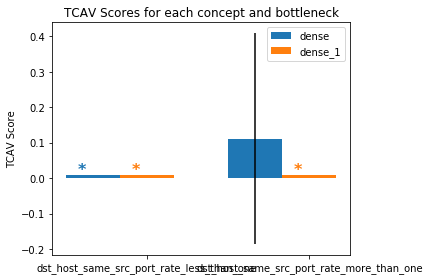

In [9]:
utils_plot.plot_results(results, num_random_exp=10)

